In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({
    'country':['India','Chile','Japan','Mexico','Turkey','Nepal','Peru','Myanmar','Pakistan'],
    'latitude':[20.59,-35.68,36.20,23.63,38.96,28.39,-9.19,21.92,30.38],
    'longitude':[78.96,-71.54,138.25,-102.55,35.24,84.12,-75.02,95.96,69.34],
    'depth':[28.36,59.62,72.14,39.10,14.46,13.04,75.74,42.36,22.18],
    'magnitude':[5.33,5.36,6.10,4.15,4.39,4.47,4.54,4.76,4.08]
})

In [8]:
print(df[['depth','magnitude']].describe())

           depth  magnitude
count   9.000000   9.000000
mean   40.777778   4.797778
std    23.791758   0.668165
min    13.040000   4.080000
25%    22.180000   4.390000
50%    39.100000   4.540000
75%    59.620000   5.330000
max    75.740000   6.100000


In [10]:
import statsmodels.api as sm

X = df[['latitude','longitude','depth']]
y = df['magnitude']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


ModuleNotFoundError: No module named 'statsmodels'

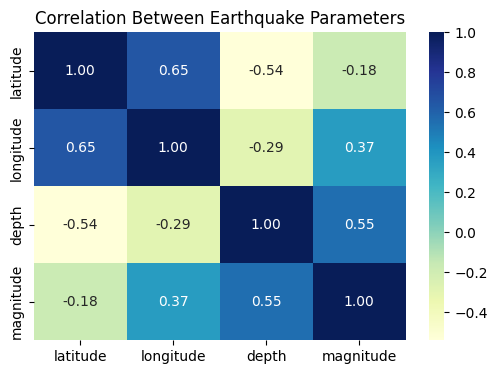

In [5]:
corr = df[['latitude','longitude','depth','magnitude']].corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between Earthquake Parameters')
plt.show()


In [6]:
# positive correlation between depth and magntiude  deepar earthquake often strong
# weak correlation between latitude and logitude.

In [7]:
from scipy.stats import zscore
df['z_mag'] = zscore(df['magnitude'])
df['z_depth'] = zscore(df['depth'])

outliers = df[(df['z_mag']>2) | (df['z_mag']<-2)]
print("🔍 Outlier Events:\n", outliers[['country','magnitude','depth']])


🔍 Outlier Events:
   country  magnitude  depth
2   Japan        6.1  72.14


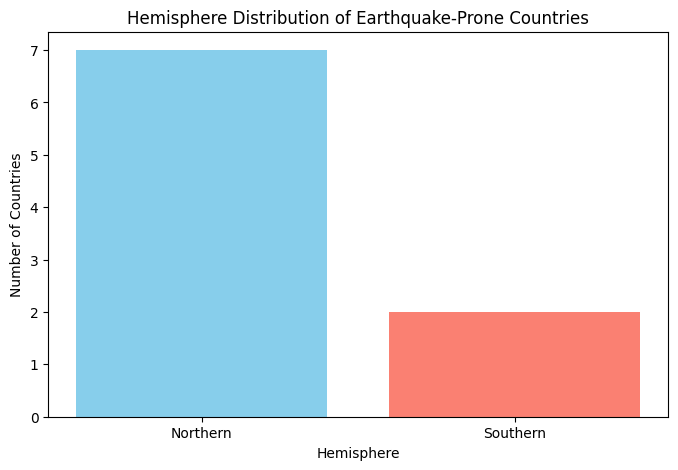

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'country': ['India','Chile','Nepal','Mexico','Peru','Turkey','Myanmar','Pakistan','Canada'],
    'latitude': [20.59, -35.68, 28.39, 23.63, -9.19, 38.96, 21.92, 30.38, 56.13],
    'longitude': [78.96, -71.54, 84.12, -102.55, -75.02, 35.24, 95.96, 69.34, -106.35]
})

df['Hemisphere'] = df['latitude'].apply(lambda x: 'Northern' if x > 0 else 'Southern')

hemisphere_counts = df['Hemisphere'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(hemisphere_counts.index, hemisphere_counts.values, color=['skyblue', 'salmon'])
plt.title("Hemisphere Distribution of Earthquake-Prone Countries")
plt.xlabel("Hemisphere")
plt.ylabel("Number of Countries")
plt.show()


In [ ]:
import pandas as pd

data = {
    'Country': ['India', 'Chile', 'Nepal', 'Mexico', 'Peru', 'Turkey', 'Myanmar', 'Pakistan', 'Japan'],
    'Latitude': [20.59, -35.68, 28.39, 23.63, -9.19, 38.96, 21.92, 30.38, 36.20],
    'Longitude': [78.96, -71.54, 84.12, -102.55, -75.02, 35.24, 95.96, 69.34, 138.25]
}

df = pd.DataFrame(data)

def classify_region(lat):
    if abs(lat) <= 23.5:
        return 'Near Equator (Tropical Zone)'
    elif abs(lat) <= 66.5:
        return 'Temperate Zone'
    else:
        return 'Polar Zone'

df['Region'] = df['Latitude'].apply(classify_region)

print(df)


    Country  Latitude  Longitude                        Region
0     India     20.59      78.96  Near Equator (Tropical Zone)
1     Chile    -35.68     -71.54                Temperate Zone
2     Nepal     28.39      84.12                Temperate Zone
3    Mexico     23.63    -102.55                Temperate Zone
4      Peru     -9.19     -75.02  Near Equator (Tropical Zone)
5    Turkey     38.96      35.24                Temperate Zone
6   Myanmar     21.92      95.96  Near Equator (Tropical Zone)
7  Pakistan     30.38      69.34                Temperate Zone
8     Japan     36.20     138.25                Temperate Zone


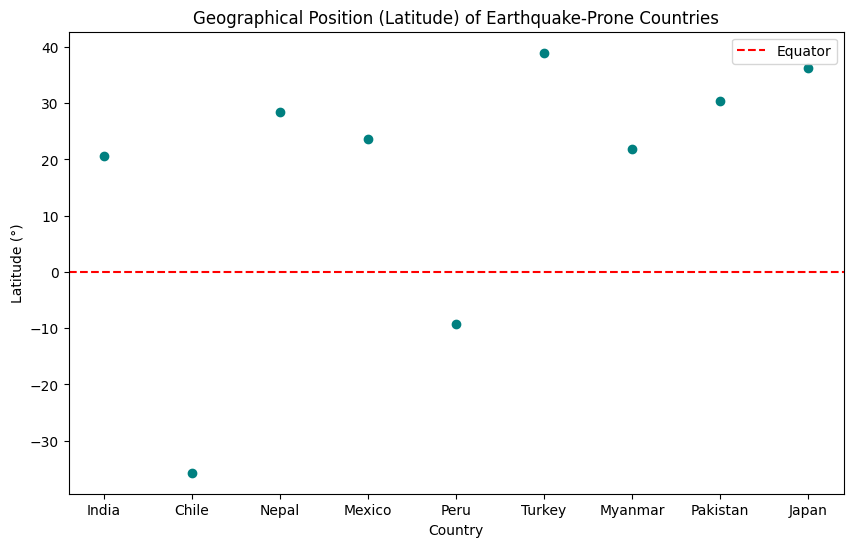

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Country'], df['Latitude'], color='teal')
plt.axhline(0, color='red', linestyle='--', label='Equator')
plt.title('Geographical Position (Latitude) of Earthquake-Prone Countries')
plt.xlabel('Country')
plt.ylabel('Latitude (°)')
plt.legend()
plt.show()


Correlation between Latitude and Depth: -0.837
Correlation between Longitude and Depth: -0.423


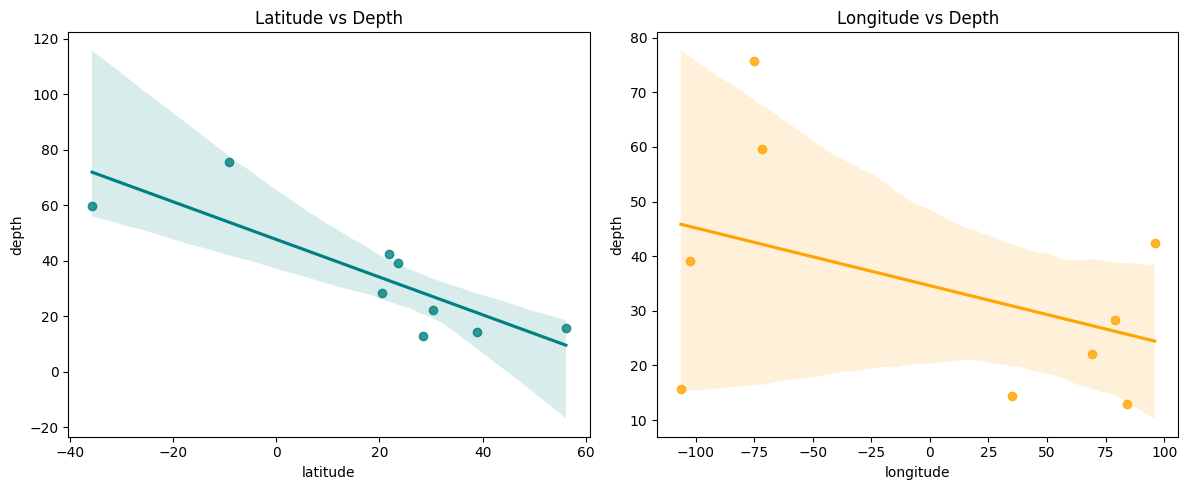

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'country':['Canada','Chile','India','Myanmar','Mexico','Nepal','Pakistan','Peru','Turkey'],
    'latitude':[56.13,-35.68,20.59,21.92,23.63,28.39,30.38,-9.19,38.96],
    'longitude':[-106.35,-71.54,78.96,95.96,-102.55,84.13,69.35,-75.02,35.24],
    'depth':[15.69,59.62,28.36,42.36,39.10,13.03,22.18,75.74,14.46]
})

corr_lat_depth = df['latitude'].corr(df['depth'])
corr_long_depth = df['longitude'].corr(df['depth'])

print(f"Correlation between Latitude and Depth: {corr_lat_depth:.3f}")
print(f"Correlation between Longitude and Depth: {corr_long_depth:.3f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(x='latitude', y='depth', data=df, color='teal')
plt.title('Latitude vs Depth')

plt.subplot(1,2,2)
sns.regplot(x='longitude', y='depth', data=df, color='orange')
plt.title('Longitude vs Depth')

plt.tight_layout()
plt.show()
